
#### `Hetal Khanapure`
 - M.No : +91-9948251997
 - Email ID : hetu.parmar@gmail.com

# Web and Social Media Analytics Capstone

### Problem Statement:

 - customer is a mobile manufacturer based in the US, which entered the market three years ago. As they are a new entrant in the sector, they want to understand
     - their competitors and preferences of their users so that they can design their strategies accordingly.
     - They want to tweak the marketing strategies to add more value to their brand, provide features to customers that add the most value, and close the demand-supply gap. 
 - Their objective is to increase the market share as well as the brand value. 

#### We devide the solution in two parts
- Part 1: Deriving the business insights that are useful for product development and marketing.
- Part 2: Creating a sentiment classification engine.

# `Part 1 : Deriving the business insights that are useful for product development and marketing.`


## Step1: Data pre-processing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500) 
pd.set_option('display.width', 1000)

### The following data sets are available
1.   meta data of type .json
2.   phone data of type .csv

The meta data holds information from sellers point of view and the phone data holds user information. 
We begin by unzipping the meta data file and extracting its content to a list



## Reading the  data



In [3]:
# Reading the meta data
# importing libraries

import gzip
import shutil

#Path to the meta data zip file. 'sentiment_analysis' is the folder name under 'My Drive'
path1 = "meta_Cell_Phones_and_Accessories.json.gz"

# Path to meta data .json file
path2 = "meta_Cell_Phones_and_Accessories.json"

# Unzipping the meta data file
with gzip.open(path1, 'rb') as f_in:
    with open(path2, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [4]:
# Reading the unzipped meta data into a Python list. The result will be a list of dictionaries. 
import json

# Empty list to store the dictonaries
phonemetadata = []

# Reading the dictionaries in the json file and appending it to the list phonemetadata[]
with open(path2, 'r') as f:
    for line in f:
        phonemetadata.append(json.loads(line))

In [5]:
# Getting the number of entries in the phonemetadata list
len(phonemetadata)

590071

In [6]:
#converting the list phonemetadata into a data frame
df_meta=pd.DataFrame(phonemetadata)

In [7]:
# we need only cellphone category data so we will extract only those data and then save it to .csv file
df_meta["category_new"] = [l[1] if len(l) > 0 else np.nan for l in df_meta["category"]]

In [8]:
df_cellponemeta= df_meta[df_meta["category_new"] == "Cell Phones"]

In [9]:
# make .csv file and store it  , this .csv file contain only cellphone related metadata and we will use that only for furthur analysis

df_cellponemeta.to_csv('cellphone_meta.csv')

In [10]:
#Reading the .csv file of the phone data into a dataframe

df_phonedata = pd.read_csv('Cell_Phones_and_Accessories_5.csv')

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
df_phonedata.head(5)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,POSITIVE
2,3.0,True,AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN,NEGATIVE
3,2.0,True,A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN,POSITIVE
4,4.0,True,A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN,POSITIVE


# **EDA**

# Data Cleaning and Pre processing






> Inspecting phone data dataframe




In [12]:
# inspecting phone data dataframe
df_phonedata.head(5)


,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,POSITIVE
2,3.0,True,AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN,NEGATIVE
3,2.0,True,A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN,POSITIVE
4,4.0,True,A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN,POSITIVE


In [13]:
# Checking the number of rows and columns in the dataframe
print("Phonedata Dataset :")
print("Rows : ", df_phonedata.shape[0])
print("Columns : ", df_phonedata.shape[1])

Phonedata Dataset :
Rows :  1128437
Columns :  12


In [14]:
# checking infor of the dataframe
df_phonedata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128437 entries, 0 to 1128436
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   overall           1128437 non-null  float64
 1   verified          1128437 non-null  bool   
 2   reviewerID        1128437 non-null  object 
 3   asin              1128437 non-null  object 
 4   style             605241 non-null   object 
 5   reviewerName      1128281 non-null  object 
 6   reviewText        1127669 non-null  object 
 7   summary           1127912 non-null  object 
 8   unixReviewTime    1128437 non-null  int64  
 9   vote              92034 non-null    object 
 10  image             27107 non-null    object 
 11  review_sentiment  1128437 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 95.8+ MB


In [15]:
# Check the summary for the numeric columns
df_phonedata.describe()

,overall,unixReviewTime
count,1.128437e+06,1.128437e+06
mean,4.221383e+00,1.440400e+09
std,1.231917e+00,4.569215e+07
min,1.000000e+00,1.035331e+09
25%,4.000000e+00,1.416355e+09
50%,5.000000e+00,1.444349e+09
75%,5.000000e+00,1.470442e+09
max,5.000000e+00,1.538438e+09


In [16]:
# Percentage of null values in each column
# Function_name : NaN_per
# Usage : To return % of missing values for all features in a DataFrame
# Arguments : dataframe
# Returns : a dataframe containing features having missing values and % of missing values in those features

def NaN_per(df):
    missing = pd.DataFrame(columns=['features','percentage'])
    for col in df.columns:
        if df[col].isna().values.any() :
            percentage = ((df[col].isna().sum()/df.shape[0])*100).round(2)
            missing = missing.append({'features' : col, 'percentage' : percentage}, ignore_index=True)
    return missing

In [17]:
NaN_app = NaN_per(df_phonedata)

In [18]:
NaN_app.sort_values('percentage', ascending=False)

,features,percentage
5,image,97.60
4,vote,91.84
0,style,46.36
2,reviewText,0.07
3,summary,0.05
1,reviewerName,0.01


In [19]:
# imupte null values in vote to 0 and convert vote to float 

df_phonedata["vote"]=df_phonedata["vote"].str.replace(',','').astype(float)


In [20]:
# fill null values in vote to 0
df_phonedata["vote"].fillna(0, inplace = True)

In [21]:
# convert overall to float
df_phonedata["overall"]=df_phonedata["overall"].astype(float)

In [22]:
#image has more null values around 98% so we will drop this column

df_phonedata=df_phonedata.drop(['image'],axis=1)


In [23]:
# style column 46% null values 
# style column have different information regarding different type of category so it wont be useful for us as we can not derive some insight from it,
# so we decided to drop this column

df_phonedata=df_phonedata.drop(["style"],axis=1)

In [24]:
# check null percentage of dataframe
NaN_app = NaN_per(df_phonedata)
NaN_app.sort_values('percentage', ascending=False)

,features,percentage
1,reviewText,0.07
2,summary,0.05
0,reviewerName,0.01


In [25]:
# as this is sentiment analysis and if review text is null then its not going to usefull, thus we will drop those rows having reviewtext null
df_phonedata = df_phonedata[df_phonedata['reviewText'].notna()]


In [26]:
# Converting unix review time to date-time format

#Transforming unixReview time to date time format
from datetime import datetime, timedelta
df_phonedata['Date&Time'] = df_phonedata['unixReviewTime'].apply(lambda d: (datetime.fromtimestamp(d) - timedelta(hours=2)).strftime('%Y-%m-%d'))


In [27]:
# check finally null vaules

# check null percentage of dataframe
NaN_app = NaN_per(df_phonedata)
NaN_app.sort_values('percentage', ascending=False)

,features,percentage
1,summary,0.04
0,reviewerName,0.01


#### Inspecting metadata dataframe df_metadata

In [28]:
df_metadata= pd.read_csv("cellphone_meta.csv")

In [29]:
# Checking the number of rows and columns in the dataframe
print("meta data Dataset :")
print("Rows : ", df_metadata.shape[0])
print("Columns : ", df_metadata.shape[1])

meta data Dataset :
Rows :  9823
Columns :  20


In [30]:
df_metadata.head()

,Unnamed: 0,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,category_new
0,36,"['Cell Phones & Accessories', 'Cell Phones', '...",NaN,"['ICE CENIOR *SENIOR PHONE*, QUAD BAND Super b...",NaN,UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,[],['https://images-na.ssl-images-amazon.com/imag...,NaN,Ice,"['2G NETWORK, Quad Band: GSM 850/900/1800/1900...","['>#6,356,920 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,8050110508,Cell Phones
1,1274,"['Cell Phones & Accessories', 'Cell Phones', '...",NaN,['Standard package: 1 x original phone 1 x Qua...,NaN,Nokia 3310 Blue Nokia,"['B075FL4H89', 'B00R25GJJW']",['https://images-na.ssl-images-amazon.com/imag...,NaN,Nokia,"['GSM 900/1800', 'Simple and elegant', 'Classi...","['>#32,759 in Electronics (See Top 100 in Elec...","['B075FL4H89', 'B075FKZMR2', 'B00TLWTJLO', 'B0...",{},All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...","October 19, 2014",NaN,B00005KBGR,Cell Phones
2,1295,"['Cell Phones & Accessories', 'Cell Phones']",NaN,"[""The Nokia 5180i is a handset offered by Trac...",NaN,Nokia 5180i TracFone Prepaid Cell Phone with 1...,[],['https://images-na.ssl-images-amazon.com/imag...,NaN,Nokia,[],[],[],{},Cell Phones & Accessories,NaN,NaN,NaN,B00005S0M4,Cell Phones
3,1354,"['Cell Phones & Accessories', 'Cell Phones', '...",NaN,"['Based on Motorola&#x92;s i90c phone, the i95...",NaN,Motorola i95cl Phone (Nextel),[],['https://images-na.ssl-images-amazon.com/imag...,NaN,NaN,[],"['>#3,798,962 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,B00006J9HH,Cell Phones
4,1361,"['Cell Phones & Accessories', 'Cell Phones', '...",NaN,['This is a GSM Samsung R225 cellular phone th...,NaN,T-Mobile Dual-Band Wireless Phone,[],['https://images-na.ssl-images-amazon.com/imag...,NaN,Samsung,[],"['>#5,552,033 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,NaN,B00006LIQB,Cell Phones


In [31]:
# drop category column 

df_metadata = df_metadata.drop(["category"],axis=1)

In [32]:
# drop Unnamed: 0 column
df_metadata = df_metadata.drop(["Unnamed: 0"],axis=1)

In [33]:
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9823 entries, 0 to 9822
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tech1         31 non-null     object 
 1   description   9823 non-null   object 
 2   fit           0 non-null      float64
 3   title         9823 non-null   object 
 4   also_buy      9823 non-null   object 
 5   image         9823 non-null   object 
 6   tech2         9 non-null      object 
 7   brand         9697 non-null   object 
 8   feature       9823 non-null   object 
 9   rank          9823 non-null   object 
 10  also_view     9823 non-null   object 
 11  details       9823 non-null   object 
 12  main_cat      9809 non-null   object 
 13  similar_item  2934 non-null   object 
 14  date          239 non-null    object 
 15  price         1745 non-null   object 
 16  asin          9823 non-null   object 
 17  category_new  9823 non-null   object 
dtypes: float64(1), object(17)
me

In [34]:
# check for duplicates

len(df_metadata[df_metadata.duplicated("asin")])

34

34 duplicate asin is present in meta data , metadata should contain only unique asin . so we will remove duplicates

In [35]:
df_metadata= df_metadata.drop_duplicates()

In [36]:
# check if rank has any [] blank values
df_metadata[df_metadata["rank"]=='[]']["rank"].count()

191

In [37]:
# check if feature has any [] blank values
df_metadata[df_metadata["feature"]=='[]']["feature"].count()

1360

In [38]:
# check null percentage of dataframe
NaN_app = NaN_per(df_metadata)
NaN_app.sort_values('percentage', ascending=False)

,features,percentage
1,fit,100.00
2,tech2,99.91
0,tech1,99.68
6,date,97.59
7,price,82.19
5,similar_item,70.04
3,brand,1.26
4,main_cat,0.14


In [39]:
print(len(NaN_app))

8


we have 10 features having null values

`price` is important feature so we will impute with the mean value of brand's price

In [40]:
df_metadata["price"].value_counts()

$40.08                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [41]:
# impute null where price having descriptive text
df_metadata["price"]=[np.nan if len(str(x))>15 else x for x in df_metadata["price"]]

In [42]:
df_metadata["price"].value_counts()

$40.08     133
$27.57     129
$16.00      44
$49.99      38
$54.99      30
          ... 
$114.69      1
$314.57      1
$128.62      1
$30.50       1
$139.95      1
Name: price, Length: 722, dtype: int64

In [43]:
# replace $ to none and convert price to float
df_metadata["price"]= df_metadata["price"].str.replace("$",'')

In [44]:
# replace , to none
df_metadata["price"]= df_metadata["price"].str.replace(",",'')

In [45]:
#convert price to float
df_metadata["price"] = df_metadata["price"].astype("float")

In [46]:
df_metadata["price"].isnull().sum()

8092

In [47]:
# check brand wise null value in price
df_metadata[df_metadata["price"].isnull()]["brand"].value_counts()

Samsung       1209
LG             616
Motorola       591
Nokia          452
BLU            440
              ... 
Dealprice        1
piu mobile       1
AWOW             1
UNKNOWN          1
BBInfinite       1
Name: brand, Length: 873, dtype: int64

In [48]:
# impute null price with their brand's mean price 

df_metadata['price'] = df_metadata['price'].fillna(df_metadata.groupby('brand')['price'].transform('mean'))

In [49]:
# check null percentage of dataframe
NaN_app = NaN_per(df_metadata)
NaN_app.sort_values('percentage', ascending=False)

,features,percentage
1,fit,100.00
2,tech2,99.91
0,tech1,99.68
6,date,97.59
5,similar_item,70.04
7,price,22.10
3,brand,1.26
4,main_cat,0.14


In [50]:
# as we can see fit,tech2,tech1,date,similar_item columns have more than 70% data are null so we will drop this columns

unwanted = []
for i in range(8):
    if NaN_app["percentage"][i] >= 50.0:
        unwanted.append(NaN_app["features"][i])

In [51]:
unwanted  #columns having missing % >=50

['tech1', 'fit', 'tech2', 'similar_item', 'date']

In [52]:
df_metadata.drop(labels=unwanted,axis=1,inplace=True) #dropped all columns from 5 columns having null values more than 50%

In [53]:
# we dont need main_cat as we are only getting the cellphone data

df_metadata.drop(["main_cat"],axis=1,inplace=True)

In [54]:
# as its text analysis we dont need image column
# droping image column

df_metadata.drop(["image"],axis=1,inplace=True)


In [55]:
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 0 to 9822
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   description   9789 non-null   object 
 1   title         9789 non-null   object 
 2   also_buy      9789 non-null   object 
 3   brand         9666 non-null   object 
 4   feature       9789 non-null   object 
 5   rank          9789 non-null   object 
 6   also_view     9789 non-null   object 
 7   details       9789 non-null   object 
 8   price         7626 non-null   float64
 9   asin          9789 non-null   object 
 10  category_new  9789 non-null   object 
dtypes: float64(1), object(10)
memory usage: 917.7+ KB


In [56]:
# extracting rank in cellphones and acessories 
df_metadata["new_rank"]=df_metadata["rank"].str.extract(pat='([^>#](\d{0,3},)?(\d{3},)?\d{0,3}\s*in Cell Phones & Accessories)')[0]



In [57]:
df_metadata["new_rank"]=df_metadata["new_rank"].str.replace(">#","").str.replace("in Cell Phones & Accessories","").str.replace(",","")

In [58]:
# convert new_rank to integer

df_metadata["new_rank"] = df_metadata["new_rank"].astype("float")

In [59]:
df_metadata[df_metadata["rank"].notnull()]

,description,title,also_buy,brand,feature,rank,also_view,details,price,asin,category_new,new_rank
0,"['ICE CENIOR *SENIOR PHONE*, QUAD BAND Super b...",UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,[],Ice,"['2G NETWORK, Quad Band: GSM 850/900/1800/1900...","['>#6,356,920 in Cell Phones & Accessories (Se...",[],{},NaN,8050110508,Cell Phones,6356920.0
1,['Standard package: 1 x original phone 1 x Qua...,Nokia 3310 Blue Nokia,"['B075FL4H89', 'B00R25GJJW']",Nokia,"['GSM 900/1800', 'Simple and elegant', 'Classi...","['>#32,759 in Electronics (See Top 100 in Elec...","['B075FL4H89', 'B075FKZMR2', 'B00TLWTJLO', 'B0...",{},92.513680,B00005KBGR,Cell Phones,NaN
2,"[""The Nokia 5180i is a handset offered by Trac...",Nokia 5180i TracFone Prepaid Cell Phone with 1...,[],Nokia,[],[],[],{},92.513680,B00005S0M4,Cell Phones,NaN
3,"['Based on Motorola&#x92;s i90c phone, the i95...",Motorola i95cl Phone (Nextel),[],NaN,[],"['>#3,798,962 in Cell Phones & Accessories (Se...",[],{},NaN,B00006J9HH,Cell Phones,3798962.0
4,['This is a GSM Samsung R225 cellular phone th...,T-Mobile Dual-Band Wireless Phone,[],Samsung,[],"['>#5,552,033 in Cell Phones & Accessories (Se...",[],{},117.247465,B00006LIQB,Cell Phones,5552033.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9818,"[""This is a New (Other) item with REAL PHOTOS ...",Samsung Galaxy Note 5 G920a 32GB Unlocked GSM ...,[],Samsung,['This Certified Refurbished product is factor...,"['>#1,391,884 in Cell Phones & Accessories (Se...",[],{},117.247465,B01HIMOY5O,Cell Phones,1391884.0
9819,['The new Xperia Z3 has the highest waterproof...,Sony Xperia Z C6616 Unlocked GSM 4G LTE WaterP...,[],Sony,"['2G: 850 / 900 / 1800 / 1900, 3G: HSDPA 850 /...","['>#1,300,328 in Cell Phones & Accessories (Se...",[],{},136.380164,B01HIQ9DMY,Cell Phones,1300328.0
9820,['Sim card: Dual SIM dual standby <br> Frequen...,Futuretech&reg; V9+ Dustproof Shakeproof smart...,[],Future Tech,"['MTK6580 1.3 Ghz, Quad Core, RAM 512MB + ROM ...","['>#1,797,901 in Cell Phones & Accessories (Se...",[],{},NaN,B01HIQK3MI,Cell Phones,1797901.0
9821,['<b>NOTE: US customized 4G version Doogee Val...,Doogee Valencia 2 Y100 Pro - Unlocked Cellphon...,[],DOOGEE,['US CUSTEMIZED VERSION GSM 850/900/1800/1900M...,"['>#641,944 in Cell Phones & Accessories (See ...",[],{},27.570000,B01HJ9X65A,Cell Phones,641944.0


In [60]:
# we got rank so we will drop rank column and keep new_Rank column

df_metadata.drop(["rank"],axis=1,inplace=True)

In [61]:
df_metadata.head(5)

,description,title,also_buy,brand,feature,also_view,details,price,asin,category_new,new_rank
0,"['ICE CENIOR *SENIOR PHONE*, QUAD BAND Super b...",UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,[],Ice,"['2G NETWORK, Quad Band: GSM 850/900/1800/1900...",[],{},NaN,8050110508,Cell Phones,6356920.0
1,['Standard package: 1 x original phone 1 x Qua...,Nokia 3310 Blue Nokia,"['B075FL4H89', 'B00R25GJJW']",Nokia,"['GSM 900/1800', 'Simple and elegant', 'Classi...","['B075FL4H89', 'B075FKZMR2', 'B00TLWTJLO', 'B0...",{},92.513680,B00005KBGR,Cell Phones,NaN
2,"[""The Nokia 5180i is a handset offered by Trac...",Nokia 5180i TracFone Prepaid Cell Phone with 1...,[],Nokia,[],[],{},92.513680,B00005S0M4,Cell Phones,NaN
3,"['Based on Motorola&#x92;s i90c phone, the i95...",Motorola i95cl Phone (Nextel),[],NaN,[],[],{},NaN,B00006J9HH,Cell Phones,3798962.0
4,['This is a GSM Samsung R225 cellular phone th...,T-Mobile Dual-Band Wireless Phone,[],Samsung,[],[],{},117.247465,B00006LIQB,Cell Phones,5552033.0


we have also_view column , from which we will derive also_view_brand column , so we will get to know which brand cellphone customer views

In [62]:
# we have also_view column , from which we will derive also_view_brand column

# convert also_view brand to list 
df_metadata=df_metadata.assign(also_view_new=df_metadata.also_view.str.replace('[','').str.replace(']','').str.replace(' ','').str.replace('\'',"").str.split(','))

In [63]:
# function to get brand name from the list of also_view

def getalsoview_brand(l):
    lb=[]
    brand=""
    for i in range(0,len(l)):
        b=df_metadata[df_metadata["asin"]==l[i]]["brand"]
    
        if len(b)>0:
            brand=b.values[0]
            if brand not in lb:
                lb.append(brand)
    
    return lb

In [64]:
# fetch unique brand from also view 
df_metadata["also_view_brand"] =[getalsoview_brand(l) if len(l) > 0 else np.nan for l in df_metadata["also_view_new"]]

In [65]:
# now we will drop unwanted columns like also_view 

df_metadata.drop(["also_view"],axis=1,inplace=True)

In [66]:
# check first few row of dataframe
df_metadata.head()


,description,title,also_buy,brand,feature,details,price,asin,category_new,new_rank,also_view_new,also_view_brand
0,"['ICE CENIOR *SENIOR PHONE*, QUAD BAND Super b...",UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,[],Ice,"['2G NETWORK, Quad Band: GSM 850/900/1800/1900...",{},NaN,8050110508,Cell Phones,6356920.0,[],[]
1,['Standard package: 1 x original phone 1 x Qua...,Nokia 3310 Blue Nokia,"['B075FL4H89', 'B00R25GJJW']",Nokia,"['GSM 900/1800', 'Simple and elegant', 'Classi...",{},92.513680,B00005KBGR,Cell Phones,NaN,"[B075FL4H89, B075FKZMR2, B00TLWTJLO, B0757B64H...","[Nokia, Caterpillar, BLU, Fsmart, ZTE, Higoo]"
2,"[""The Nokia 5180i is a handset offered by Trac...",Nokia 5180i TracFone Prepaid Cell Phone with 1...,[],Nokia,[],{},92.513680,B00005S0M4,Cell Phones,NaN,[],[]
3,"['Based on Motorola&#x92;s i90c phone, the i95...",Motorola i95cl Phone (Nextel),[],NaN,[],{},NaN,B00006J9HH,Cell Phones,3798962.0,[],[]
4,['This is a GSM Samsung R225 cellular phone th...,T-Mobile Dual-Band Wireless Phone,[],Samsung,[],{},117.247465,B00006LIQB,Cell Phones,5552033.0,[],[]


In [67]:
df_metadata.describe()

,price,new_rank
count,7626.000000,9.400000e+03
mean,97.247979,1.857680e+06
std,73.982238,1.790868e+06
min,4.800000,7.770000e+02
25%,69.000000,5.561145e+05
50%,79.675088,1.226360e+06
75%,117.247465,2.444491e+06
max,1924.000000,7.731287e+06


In [68]:
# check null percentage of dataframe
NaN_app = NaN_per(df_metadata)
NaN_app.sort_values('percentage', ascending=False)

,features,percentage
1,price,22.10
2,new_rank,3.97
0,brand,1.26


we will keep above null values as it is as we will get to observe only top brands for this analysis.



> # Merging two dataframe



we need to merge two dataframe one is containing reviews and other is contains details about the product.

In [69]:
# merge two dataframe 
# we will use innerjoin to merge two dataframe 
df_merged = pd.merge(df_phonedata, df_metadata, how='inner', on=['asin'])


In [70]:
# checking information of merged dataframe
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63838 entries, 0 to 63837
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   overall           63838 non-null  float64
 1   verified          63838 non-null  bool   
 2   reviewerID        63838 non-null  object 
 3   asin              63838 non-null  object 
 4   reviewerName      63829 non-null  object 
 5   reviewText        63838 non-null  object 
 6   summary           63821 non-null  object 
 7   unixReviewTime    63838 non-null  int64  
 8   vote              63838 non-null  float64
 9   review_sentiment  63838 non-null  object 
 10  Date&Time         63838 non-null  object 
 11  description       63838 non-null  object 
 12  title             63838 non-null  object 
 13  also_buy          63838 non-null  object 
 14  brand             63772 non-null  object 
 15  feature           63838 non-null  object 
 16  details           63838 non-null  object

In [71]:
# after merging dataframes lets change datatypes of boolean columns to integer (true =1, false=0)

df_merged["verified"].replace({False: 0, True: 1}, inplace=True)

In [72]:
df_merged.head()

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,review_sentiment,Date&Time,description,title,also_buy,brand,feature,details,price,category_new,new_rank,also_view_new,also_view_brand
0,1.0,0,A5JLAU2ARJ0BO,B0000E3GWH,Old-and-Wise,This phone is ugly and heavy and has a terribl...,Bad reception,1095724800,0.0,NEGATIVE,2004-09-21,"[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[],[]
1,4.0,0,A1ACM1CBGORBN1,B0000E3GWH,Sherry Berry,I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,1090627200,0.0,POSITIVE,2004-07-24,"[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[],[]
2,3.0,0,A2V48Q03FZUOSD,B0000E3GWH,Benjamin David,This is the first Samsung phone I have had and...,Not as user friendly as the Motorola V300-,1089072000,0.0,NEGATIVE,2004-07-06,"[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[],[]
3,5.0,1,A1V3TRGWOMA8LC,B0000E3GWH,James Beswick,"..and I'm from Europe, where the phones and ne...",The best phone I've ever owned,1081728000,0.0,POSITIVE,2004-04-12,"[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[],[]
4,3.0,0,A3NOBH42C7UI5M,B0000E3GWH,Kepela,This phone is amazingly small and light for a ...,I love the phone but it has some real problems,1077148800,0.0,POSITIVE,2004-02-19,"[""Compatible with T-Mobile cellular service, S...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[],[]


In [73]:
# we will convert merged dataframe into .csv and export that as well
df_merged.to_excel('merged_dataset_model.xlsx', index=False)

In [74]:
# no of records
len(df_merged)

63838

In [75]:
# counting positive and negative instances
pos_neg = df_merged.review_sentiment.value_counts()
pos_neg

POSITIVE    47677
NEGATIVE    16161
Name: review_sentiment, dtype: int64

 #### checking counts of positive and negative lable

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


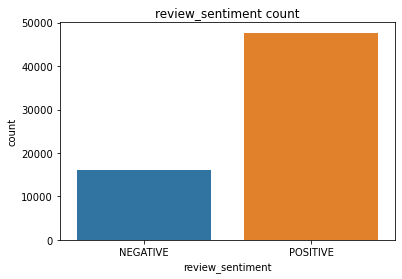

In [76]:
plt.title("review_sentiment count")
sns.countplot(df_merged['review_sentiment'])
plt.show()

In [77]:
# display number of positive and negative reviews

neg  = pos_neg[1]
pos  = pos_neg[0]

print("No. of negative review: ", neg)
print("\nNo. of positive review: ", pos)
print("\nnegative review rate is about {0}%".format(
    round((neg/float(pos+neg))*100), 2))
print("\npositve review rate is about {0}%".format(
    round((pos/float(pos+neg))*100), 2))


No. of negative review:  16161

No. of positive review:  47677

negative review rate is about 25%

positve review rate is about 75%


Observation : we can see that the data is imbalance 

#### check how review sentiment change with overall rating

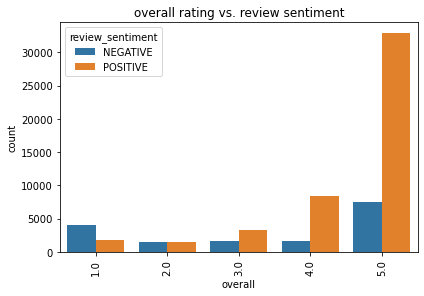

In [78]:
plt.figure()
sns.countplot(data=df_merged,x=df_merged["overall"],hue=df_merged["review_sentiment"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("overall rating vs. review sentiment")
plt.show()

Observation : From above plot we can say that positive reviews have high overall rating as expected , no any different pattern found. for rating 1 the negative reviews are more.

#### top 10 brands by review count

In [79]:
# top 10 brand having more count of reviews
df_merged['brand'].value_counts()[:10]

Samsung       16195
BLU            9328
LG             6657
Motorola       4922
Nokia          4885
Apple          4049
BlackBerry     3656
HTC            2453
Sony           1556
Huawei         1401
Name: brand, dtype: int64

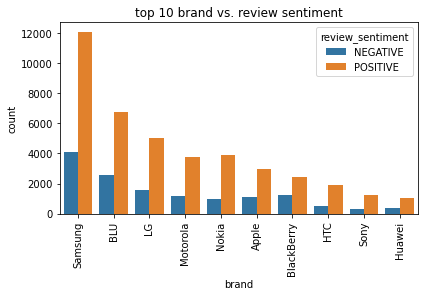

In [80]:
plt.figure()
sns.countplot(data=df_merged,x=df_merged["brand"],hue=df_merged["review_sentiment"],order=df_merged["brand"].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("top 10 brand vs. review sentiment")
plt.show()

Observation : samsung , blue , LG , Motorola ,Nokia ,Apple,Blackberry ,HTC , sony ,huawei are top 10 brands 

#### Top 10 brand vs their rank in cellphone category 

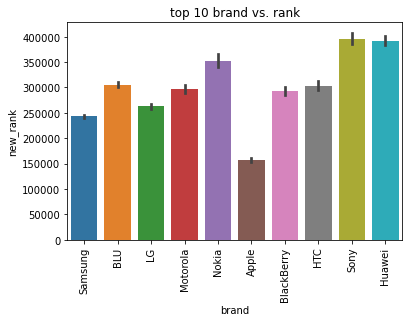

In [81]:
plt.figure()
sns.barplot (data=df_merged,x=df_merged["brand"],y=df_merged["new_rank"],order=df_merged["brand"].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
#plt.tight_layout()
plt.title("top 10 brand vs. rank")
plt.show()

observation : the plot shows the Sony brand got highest rank in the data

#### check how many reviews are varified 

In [82]:
df_merged["verified"].value_counts()

1    54994
0     8844
Name: verified, dtype: int64

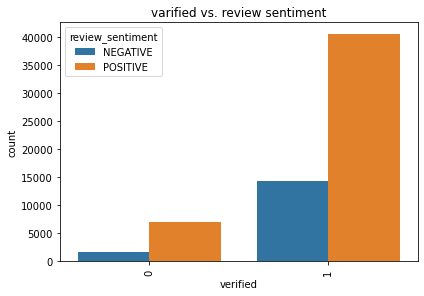

In [83]:
plt.figure()
sns.countplot(data=df_merged,x=df_merged["verified"],hue=df_merged["review_sentiment"])

plt.xticks(rotation=90)
plt.tight_layout()
plt.title("varified vs. review sentiment")
plt.show()

Observation : almost all reviews are varified , not varified reviews are less

#### number of reviews year wise

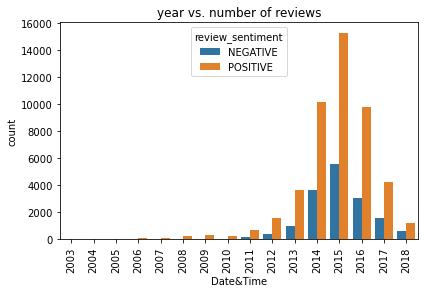

In [84]:
plt.figure()
sns.countplot(data=df_merged,x=pd.DatetimeIndex(df_merged['Date&Time']).year,hue=df_merged["review_sentiment"])

plt.xticks(rotation=90)
plt.tight_layout()
plt.title("year vs. number of reviews")
plt.show()

observation : in year 2015 gets highest number of reviews which declines in 2016 year.

#### price for top 10 brands

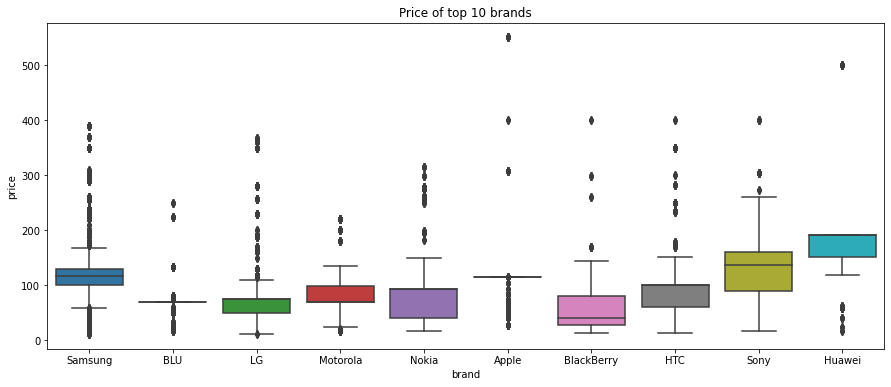

In [85]:
plt.figure(figsize=[15,6])
plt.title("Price of top 10 brands")
sns.boxplot(data=df_merged,x="brand",y="price",order=df_merged["brand"].value_counts().iloc[:10].index)
plt.show()

#### distribution of Price

In [86]:
df_merged["price"].value_counts()

69.594118      8495
117.247465     6951
115.123617     3315
75.618945      3009
69.264778      2579
40.080000      2364
27.570000      2328
92.513680      1486
15.980000      1378
100.393540      972
16.000000       879
189.000000      871
79.675088       840
220.000000      806
192.018571      748
73.557500       679
136.380164      641
89.990000       524
49.980000       500
129.990000      488
94.990000       462
99.000000       413
38.793750       400
46.340000       384
152.000000      373
169.000000      373
74.990000       366
49.990000       362
119.000000      339
295.070000      329
49.763143       321
109.940000      311
33.698750       285
149.990000      262
24.990000       248
95.590000       218
117.820000      216
56.752500       214
99.990000       211
79.990000       210
129.000000      210
69.950000       206
62.050000       206
125.000000      206
158.720000      205
59.500000       195
74.980000       194
52.152500       184
219.990000      180
129.720000      172


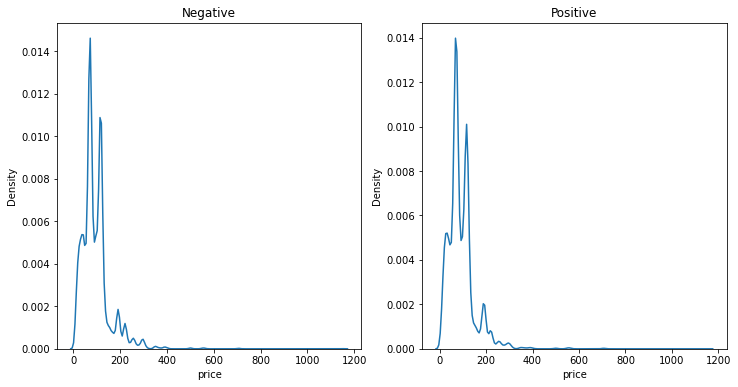

In [87]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Negative")
ax2 = fig.add_subplot(1, 2, 2, title="Positive")

sns.kdeplot(df_merged[df_merged["review_sentiment"] == "POSITIVE"]["price"], ax=ax1)
sns.kdeplot(df_merged[df_merged["review_sentiment"] == "NEGATIVE"]["price"], ax=ax2)

plt.show()

Observation : most reviews comes for price around 69$

# Text Analytics

In [88]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [89]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [90]:
# importing libraries
from nltk import FreqDist
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re
pd.set_option('max_colwidth', 100)
from sklearn.feature_extraction.text import TfidfVectorizer

In [91]:
# Reading stop words from a text file in to a list
stop_words = [line.rstrip('\n') for line in open('stop_words_long.txt')]

First step is to remove stop words , here we will use above file to remove stop words because we dont want to remove "no,not" like words which help us in text analytics.
Also we will remove any puncuation marks and numbers etc.

### functions removing stop words , positive and negative words and punctuation marks 

In [92]:
# function for removing stop words

stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
def preprocess(document):
    
    # change sentence to lower case
    document = document.lower()

       
    # tokenize into words
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stop_words]
    
    
    # take only thos words whose length is greater than 2
    words=[w for w in words if len(w)>2]
    
    # join words to make sentence
    document = " ".join(words)
    
    return document

In [93]:
# function to remove positive / negative words from document

def remove_words(document):
   # tokenize into words
    words = word_tokenize(document)

    # remove positive/negative words
    words = [word for word in words if word not in positive_words]
    words = [word for word in words if word not in negative_words]
    
    document = " ".join(words)
    
    return document

In [94]:
def remove_punctuations(text):
    text = re.sub('[^A-Za-z]+', ' ', text)
    
    return text

In [95]:
# now run lemmatization 

stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
def apply_lemmatization(document):
     # tokenize into words
         # change sentence to lower case
    document = document.lower()
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stop_words]
    
    #apply lemmatization
    words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]

    words=[w for w in words if len(w)>2]
    
    # join words to make sentence
    document = " ".join(words)
    
    return document


#### preprocessing review text for visulization in tableau

In [96]:
# make new dataframe for only reviews and sentiment
df_review=df_merged[["reviewText","review_sentiment"]]

In [97]:
df_review["review_text_nostop"]=[preprocess(x) for x in df_review["reviewText"]]

<ipython-input-97-c2d9bafe808d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review["review_text_nostop"]=[preprocess(x) for x in df_review["reviewText"]]


In [98]:
df_review["review_text_nostop"]

0        phone ugly heavy terrible user interface techies like drops calls like crazy manhattan moto v600...
1        samsung v205 decided try e715 fyi people battery problems batteries drain completely charge like...
2        samsung phone not measure-up v300 tmobile customer finally fed v300 terrible camera tmobile sent...
3        europe phones networks better samsung currently best software huge nokia fan amazingly light int...
4        phone amazingly light camera phone flashlight/flash problems phone real problem battery life wor...
                                                        ...                                                 
63833                                             phone stolen not activate told comes stolen n't appreciate
63834                                                                                                   good
63835       purchased problems finally tossed screens glitching disappointing samsung usually great products
63836              

In [99]:
# Reading positive words from a text file in to a list
positive_words = [line.rstrip('\n') for line in open('pos_words.txt')]

In [100]:
# Reading negative words from a text file in to a list
negative_words = [line.rstrip('\n') for line in open('neg_words.txt')]

In [101]:
# remove positve and negative words from the review to get most important features out of it.
    
df_review["review_text_nostop"]=[remove_words(x) for (x) in df_review["review_text_nostop"]]

<ipython-input-101-480fbfa82fa8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review["review_text_nostop"]=[remove_words(x) for (x) in df_review["review_text_nostop"]]


In [102]:

df_review["review_text_nostop"] = df_review['review_text_nostop'].apply(remove_punctuations)

<ipython-input-102-8139f0ebb607>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review["review_text_nostop"] = df_review['review_text_nostop'].apply(remove_punctuations)


In [103]:
# after removing punctuation marks still there are some stop words so running above function to remove remaining stopwords and do lemmatization.
df_review["review_text_nostop"]=[apply_lemmatization(x) for x in df_review["review_text_nostop"]]

<ipython-input-103-6eb2d6d6cfdd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review["review_text_nostop"]=[apply_lemmatization(x) for x in df_review["review_text_nostop"]]


In [104]:
df_review["review_text_nostop"]

0        phone heavy user interface techies drop call manhattan moto phone take picture reception moto mo...
1        samsung decide try fyi people battery batteries completely charge build battery life time batter...
2        samsung phone measure tmobile customer finally feed camera tmobile send upgrade feature phone ex...
3        europe phone network samsung currently software huge nokia fan light audio look reservations wha...
4        phone light camera phone flashlight flash phone real battery life phone own days stand phone min...
                                                        ...                                                 
63833                                                                               phone activate tell come
63834                                                                                                       
63835                                        purchase finally toss screen glitching samsung usually products
63836              

In [105]:

# devide positive and negative review in different dataframe to create word cloud in tableau

df_positive = df_review[df_review["review_sentiment"]=="POSITIVE"][["review_text_nostop","review_sentiment"]]
df_negative = df_review[df_review["review_sentiment"]=="NEGATIVE"][["review_text_nostop","review_sentiment"]]
 

In [106]:
df_positive.head()

,review_text_nostop,review_sentiment
1,samsung decide try fyi people battery batteries completely charge build battery life time batter...,POSITIVE
3,europe phone network samsung currently software huge nokia fan light audio look reservations wha...,POSITIVE
4,phone light camera phone flashlight flash phone real battery life phone own days stand phone min...,POSITIVE
5,see explosion color phone market functionalities similar extra bell whistle sell product attract...,POSITIVE
6,receive treo friday treocentral service sprint test compare sprint coverage mobile verizon nexte...,POSITIVE


In [107]:
# check first few rows of df_negative
df_negative.head()

,review_text_nostop,review_sentiment
0,phone heavy user interface techies drop call manhattan moto phone take picture reception moto mo...,NEGATIVE
2,samsung phone measure tmobile customer finally feed camera tmobile send upgrade feature phone ex...,NEGATIVE
12,frank high expectations treo read time release actual front deserve star pocketable phone bigges...,NEGATIVE
22,chicago gps yes window dozens time surround suburbs miles north chicago telenav company sell gps...,NEGATIVE
23,forum people express believe reality sprint nextel service service relatively cellular void upst...,NEGATIVE


In [108]:
# prepare file for word cloud negative and positive and export those file 
neg_sentiment_features= df_negative[["review_text_nostop"]]
pos_sentiment_features= df_positive[["review_text_nostop"]]



In [109]:
pos_sentiment_features.head()

,review_text_nostop
1,samsung decide try fyi people battery batteries completely charge build battery life time batter...
3,europe phone network samsung currently software huge nokia fan light audio look reservations wha...
4,phone light camera phone flashlight flash phone real battery life phone own days stand phone min...
5,see explosion color phone market functionalities similar extra bell whistle sell product attract...
6,receive treo friday treocentral service sprint test compare sprint coverage mobile verizon nexte...


In [110]:
neg_sentiment_features.head()

,review_text_nostop
0,phone heavy user interface techies drop call manhattan moto phone take picture reception moto mo...
2,samsung phone measure tmobile customer finally feed camera tmobile send upgrade feature phone ex...
12,frank high expectations treo read time release actual front deserve star pocketable phone bigges...
22,chicago gps yes window dozens time surround suburbs miles north chicago telenav company sell gps...
23,forum people express believe reality sprint nextel service service relatively cellular void upst...


In [111]:
lst_pos= [str(w).split(" ") for w in neg_sentiment_features["review_text_nostop"]]
lst_neg= [str(w).split(" ") for w in neg_sentiment_features["review_text_nostop"]]

In [112]:
#flatten the list
import itertools
merged_pos = list(itertools.chain(*lst_pos))
merged_neg = list(itertools.chain(*lst_neg))

In [113]:
merged_pos

['phone',
 'heavy',
 'user',
 'interface',
 'techies',
 'drop',
 'call',
 'manhattan',
 'moto',
 'phone',
 'take',
 'picture',
 'reception',
 'moto',
 'mobile',
 'stay',
 'samsung',
 'phone',
 'measure',
 'tmobile',
 'customer',
 'finally',
 'feed',
 'camera',
 'tmobile',
 'send',
 'upgrade',
 'feature',
 'phone',
 'external',
 'antenna',
 'brake',
 'camera',
 'take',
 'picture',
 'phone',
 'sound',
 'quality',
 'call',
 'receiver',
 'tinny',
 'sound',
 'digital',
 'unlike',
 'realize',
 'receive',
 'phone',
 'feature',
 'maybe',
 'phone',
 'technology',
 'phone',
 'example',
 'phone',
 'datebook',
 'set',
 'alarm',
 'remind',
 'appointments',
 'speakerphone',
 'time',
 'simply',
 'commodore',
 'computer',
 'world',
 'ghz',
 'processors',
 'lastly',
 'simply',
 'smart',
 'phone',
 'word',
 'feature',
 'pack',
 'practically',
 'design',
 'cell',
 'phone',
 'opinion',
 'art',
 'look',
 'accomodate',
 'user',
 'practical',
 'feature',
 'phone',
 'short',
 'debate',
 'phone',
 'upgrade',
 

In [114]:
merged_neg

['phone',
 'heavy',
 'user',
 'interface',
 'techies',
 'drop',
 'call',
 'manhattan',
 'moto',
 'phone',
 'take',
 'picture',
 'reception',
 'moto',
 'mobile',
 'stay',
 'samsung',
 'phone',
 'measure',
 'tmobile',
 'customer',
 'finally',
 'feed',
 'camera',
 'tmobile',
 'send',
 'upgrade',
 'feature',
 'phone',
 'external',
 'antenna',
 'brake',
 'camera',
 'take',
 'picture',
 'phone',
 'sound',
 'quality',
 'call',
 'receiver',
 'tinny',
 'sound',
 'digital',
 'unlike',
 'realize',
 'receive',
 'phone',
 'feature',
 'maybe',
 'phone',
 'technology',
 'phone',
 'example',
 'phone',
 'datebook',
 'set',
 'alarm',
 'remind',
 'appointments',
 'speakerphone',
 'time',
 'simply',
 'commodore',
 'computer',
 'world',
 'ghz',
 'processors',
 'lastly',
 'simply',
 'smart',
 'phone',
 'word',
 'feature',
 'pack',
 'practically',
 'design',
 'cell',
 'phone',
 'opinion',
 'art',
 'look',
 'accomodate',
 'user',
 'practical',
 'feature',
 'phone',
 'short',
 'debate',
 'phone',
 'upgrade',
 

In [115]:
df_pos = pd.DataFrame({'col':merged_pos})
df_neg = pd.DataFrame({'col':merged_neg})

In [116]:
## Note : this two file already saved and used in tableau file , 
## so commented this code because used extract connection in tableau project

# df_pos.to_csv("pos_sentiment_word.csv")
# df_pos.to_csv("neg_sentiment_word.csv")

### Bag of words

In [117]:
from sklearn.feature_extraction.text import CountVectorizer

#### Bag of words for positive sentiment

In [118]:

positive_reviews= [message for message in pos_sentiment_features['review_text_nostop']]

In [119]:
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(positive_reviews)
print(bow_model)

  (0, 18804)	1
  (0, 5316)	1
  (0, 22583)	1
  (0, 8585)	1
  (0, 15779)	1
  (0, 1937)	3
  (0, 1935)	1
  (0, 4207)	1
  (0, 3512)	1
  (0, 2881)	1
  (0, 12222)	2
  (0, 22043)	2
  (0, 10498)	1
  (0, 13629)	1
  (0, 5059)	2
  (0, 20636)	1
  (0, 19277)	1
  (0, 17490)	1
  (0, 16225)	1
  (0, 293)	1
  (0, 7734)	2
  (0, 12367)	1
  (0, 8590)	1
  (0, 3093)	1
  (0, 16098)	1
  :	:
  (47676, 18233)	1
  (47676, 13868)	1
  (47676, 16324)	1
  (47676, 10905)	1
  (47676, 9858)	2
  (47676, 1469)	1
  (47676, 12585)	1
  (47676, 12295)	2
  (47676, 7757)	1
  (47676, 5611)	1
  (47676, 13553)	1
  (47676, 14575)	1
  (47676, 14626)	1
  (47676, 5627)	1
  (47676, 19915)	1
  (47676, 15108)	1
  (47676, 9565)	2
  (47676, 6930)	1
  (47676, 12049)	1
  (47676, 14600)	1
  (47676, 4466)	1
  (47676, 2370)	1
  (47676, 8611)	2
  (47676, 15526)	1
  (47676, 20662)	1


In [120]:
#Printing the feature names
print(vectorizer.get_feature_names())

['aaa', 'aaaa', 'aaaaa', 'aaaaammmmaaaaazzzziiiiinnnngggg', 'aaahs', 'aac', 'aacute', 'aadverts', 'aall', 'aand', 'aapoor', 'aaqbddx', 'aarp', 'aarrgghh', 'aas', 'aasa', 'aauggh', 'aav', 'aback', 'abajo', 'abale', 'abandon', 'abandonned', 'abble', 'abbreviate', 'abbreviations', 'abc', 'abcdef', 'abcs', 'abd', 'abea', 'abeit', 'abhor', 'abilit', 'abilities', 'ability', 'abit', 'abject', 'able', 'ablilty', 'abm', 'abndroidm', 'abnormally', 'aboard', 'abou', 'abouse', 'abouth', 'aboutwell', 'abput', 'abr', 'abraham', 'abrams', 'abrasives', 'abreast', 'abreviated', 'abrir', 'abroad', 'abs', 'absense', 'absent', 'absolsutely', 'absolute', 'absoluted', 'absolutely', 'absolutes', 'absolutley', 'absolutly', 'absorb', 'absorbent', 'absorption', 'absorptive', 'absoutely', 'abstain', 'abstract', 'abt', 'abtak', 'abtract', 'abuse', 'abuser', 'abut', 'abv', 'abx', 'abysmal', 'abyssal', 'abyssmal', 'aca', 'academic', 'academy', 'acalendar', 'acar', 'acativated', 'acc', 'accelaration', 'accelerate', 

In [121]:
#Print the vocabulary
vectorizer.vocabulary_

{'samsung': 18804,
 'decide': 5316,
 'try': 22583,
 'fyi': 8585,
 'people': 15779,
 'battery': 1937,
 'batteries': 1935,
 'completely': 4207,
 'charge': 3512,
 'build': 2881,
 'life': 12222,
 'time': 22043,
 'immensely': 10498,
 'mobile': 13629,
 'customer': 5059,
 'stay': 20636,
 'service': 19277,
 'rate': 17490,
 'plan': 16225,
 'additional': 293,
 'feature': 7734,
 'little': 12367,
 'gadget': 8590,
 'caller': 3093,
 'pics': 16098,
 'able': 38,
 'external': 7489,
 'display': 5956,
 'flip': 8060,
 'person': 15888,
 'camera': 3115,
 'flash': 7999,
 'zoom': 25099,
 'picture': 16106,
 'gray': 9219,
 'black': 2313,
 'white': 24317,
 'sepia': 19236,
 'sketch': 19708,
 'multi': 13974,
 'shoot': 19435,
 'lot': 12549,
 'frame': 8323,
 'download': 6192,
 'game': 8629,
 'whereas': 24286,
 'furthermore': 8556,
 'actually': 247,
 'java': 11362,
 'serve': 19272,
 'flashlight': 8012,
 'sometimes': 20153,
 'walk': 23977,
 'light': 12245,
 'voice': 23844,
 'memo': 13171,
 'nuf': 14695,
 'otherwise': 

In [122]:
pos_vocabular = pd.DataFrame.from_dict(vectorizer.vocabulary_,orient='index')

In [123]:
#pos_vocabular
pos_vocabular

,0
samsung,18804
decide,5316
try,22583
fyi,8585
people,15779
...,...
apdated,1047
rampant,17456
officials,14868
formable,8227


#### Bag of words for negative sentiment

In [124]:

negative_reviews= [message for message in neg_sentiment_features['review_text_nostop']]

In [125]:
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(negative_reviews)
print(bow_model)

  (0, 6671)	2
  (0, 4129)	1
  (0, 9843)	1
  (0, 4656)	1
  (0, 9084)	1
  (0, 2651)	1
  (0, 1246)	1
  (0, 5375)	1
  (0, 5765)	2
  (0, 9021)	1
  (0, 6705)	1
  (0, 7415)	1
  (0, 5674)	1
  (0, 8750)	1
  (1, 6671)	12
  (1, 9843)	1
  (1, 1246)	1
  (1, 9021)	1
  (1, 6705)	1
  (1, 7974)	1
  (1, 5448)	1
  (1, 9367)	2
  (1, 2075)	1
  (1, 3389)	1
  (1, 3341)	1
  :	:
  (16154, 3381)	1
  (16154, 7436)	1
  (16154, 1509)	1
  (16154, 464)	1
  (16154, 9008)	1
  (16154, 6168)	1
  (16154, 7874)	2
  (16154, 4088)	1
  (16154, 5680)	1
  (16155, 5733)	1
  (16155, 7824)	1
  (16155, 8793)	1
  (16156, 3880)	1
  (16156, 3110)	1
  (16157, 4755)	1
  (16157, 7784)	1
  (16158, 6671)	1
  (16158, 5240)	1
  (16158, 8293)	1
  (16158, 7393)	1
  (16159, 6671)	1
  (16159, 1621)	1
  (16159, 9145)	1
  (16159, 100)	1
  (16160, 3110)	1


In [126]:
#Printing the feature names
neg_words=vectorizer.get_feature_names()
print(vectorizer.get_feature_names())

['aaa', 'aaaaa', 'aaaaaa', 'aaaaaaaaa', 'aab', 'aacute', 'aall', 'aback', 'abad', 'abajo', 'abandon', 'abbreviate', 'abbreviations', 'abc', 'abe', 'abhorrent', 'abiertas', 'abierto', 'abilities', 'ability', 'abirthday', 'abismal', 'able', 'aboutique', 'abres', 'abrir', 'abroad', 'absent', 'absolute', 'absolutely', 'absolutley', 'absolutly', 'absorb', 'absoulty', 'abuse', 'abvious', 'aca', 'acabado', 'acabados', 'academic', 'accebility', 'accecssable', 'accelerometer', 'accelorometer', 'accent', 'accept', 'acceptable', 'acceptably', 'acceptance', 'accesible', 'accesories', 'accesorios', 'accesory', 'access', 'accessability', 'accessibilities', 'accessibility', 'accessories', 'accessory', 'accident', 'accidental', 'accidentally', 'accidently', 'accidents', 'accommodate', 'accomodate', 'accompany', 'accomplice', 'accord', 'accordingly', 'account', 'accountability', 'accountable', 'accout', 'accpet', 'accross', 'acct', 'accumulate', 'accuracy', 'accustom', 'accuweather', 'ace', 'acept', 'a

In [127]:
#Print the vocabulary
vectorizer.vocabulary_

{'phone': 6671,
 'heavy': 4129,
 'user': 9843,
 'interface': 4656,
 'techies': 9084,
 'drop': 2651,
 'call': 1246,
 'manhattan': 5375,
 'moto': 5765,
 'take': 9021,
 'picture': 6705,
 'reception': 7415,
 'mobile': 5674,
 'stay': 8750,
 'samsung': 7974,
 'measure': 5448,
 'tmobile': 9367,
 'customer': 2075,
 'finally': 3389,
 'feed': 3341,
 'camera': 1261,
 'send': 8159,
 'upgrade': 9802,
 'feature': 3332,
 'external': 3247,
 'antenna': 413,
 'brake': 1068,
 'sound': 8580,
 'quality': 7233,
 'receiver': 7409,
 'tinny': 9342,
 'digital': 2431,
 'unlike': 9730,
 'realize': 7372,
 'receive': 7408,
 'maybe': 5435,
 'technology': 9097,
 'example': 3098,
 'datebook': 2139,
 'set': 8202,
 'alarm': 249,
 'remind': 7608,
 'appointments': 480,
 'speakerphone': 8611,
 'time': 9328,
 'simply': 8350,
 'commodore': 1642,
 'computer': 1732,
 'world': 10330,
 'ghz': 3760,
 'processors': 7044,
 'lastly': 5000,
 'smart': 8448,
 'word': 10314,
 'pack': 6404,
 'practically': 6911,
 'design': 2338,
 'cell':

In [128]:
neg_vocabular = pd.DataFrame.from_dict(vectorizer.vocabulary_,orient='index')

In [129]:
neg_vocabular

,0
phone,6671
heavy,4129
user,9843
interface,4656
techies,9084
...,...
slowwwwww,8439
guyana,3993
imagination,4411
mobo,5680


In this file we have done EDA and Text preprocessing and prepare .csv file for wordcloud in tableau.

----------------------------END----------------------------------------